In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint

In [121]:
df = pd.read_hdf("store.h5")

df["time_of_day"] = df['time'].apply(lambda x: datetime.fromtimestamp(x).time())
df["day_of_month"] = df['time'].apply(lambda x: int((datetime.fromtimestamp(x)).strftime("%d")))
df["date"] = df['time'].apply(lambda x: (datetime.fromtimestamp(x)).strftime("%Y-%m-%d"))
df['returns'] = df["close"] - df["close"].shift(1)
df['abs_ret'] = abs(df['returns'])
# df["day_of_month"].astype(int,inplace = True)
df["range"] = df["high"] - df["low"]

In [122]:
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,date,returns,abs_ret,range
date_time,,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2017-07-31,NaN,NaN,2.00
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,2017-07-31,0.12,0.12,1.57
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,2017-07-31,0.37,0.37,0.97
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,2017-07-31,-0.36,0.36,0.90
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2017-07-31,1.93,1.93,2.44


1 std 8.159378637671352
2 std 16.318757275342705
3 std 24.478135913014057


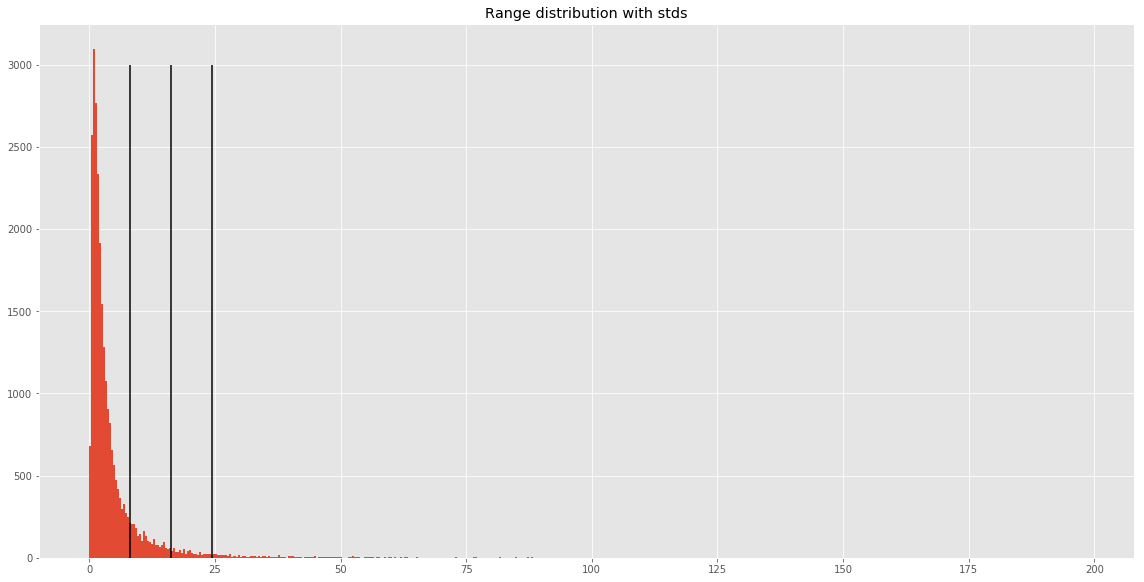

In [11]:

print(f"1 std {df['range'].std()}")
print(f"2 std {df['range'].std()*2}")
print(f"3 std {df['range'].std()*3}")
      
 
      
plt.figure(figsize=(16,8))
df['range'].hist(bins=500)  
strange = df['range'].std()
plt.vlines([strange,strange*2,strange*3],0,3000)
plt.tight_layout()
plt.title("Range distribution with stds")
plt.savefig("../../../report/fig/move.png",dpi=250)
plt.show()      

Most amount of candles

In [12]:
df["is_green"] = df["close"] > df["open"]
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,range,is_green
date_time,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2.00,True
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,1.57,True
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,0.97,True
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,0.90,False
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2.44,True


In [37]:
def candle_in_row(is_green):
    """
    takes a pandas series returns a np.array
    """
    
    count = 1
    in_row = np.ones(len(is_green))
    for i in range(1,len(is_green)):
        if is_green[i] == is_green[i-1]:
            count += 1
            in_row[i] = count
        else:
            count = 1
            in_row[i] = count
    return in_row 
            
df["candle_in_row"] = candle_in_row(df["is_green"])
df["candle_in_row"] = df["candle_in_row"].astype(np.int)
df.head(10)

,time,low,high,open,close,volume,day,time_of_day,day_of_month,range,is_green,candle_in_row
date_time,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2.00,True,1
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,1.57,True,2
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,0.97,True,3
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,0.90,False,1
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2.44,True,1
2017-07-31 17:00:00,1501484400,195.86,197.47,197.25,195.86,2659.940485,0,17:00:00,31,1.61,False,1
2017-07-31 18:00:00,1501488000,194.30,196.00,195.86,194.30,2768.297807,0,18:00:00,31,1.70,False,2
2017-07-31 19:00:00,1501491600,194.08,196.29,194.31,194.82,1747.161193,0,19:00:00,31,2.21,True,1
2017-07-31 20:00:00,1501495200,193.45,194.89,194.80,193.45,3717.936676,0,20:00:00,31,1.44,False,1


In [38]:
print(df['candle_in_row'].max())
print(df['candle_in_row'].idxmax())

12
2017-10-06 23:00:00


In [46]:
df[Timestamp('2017-10-06 23:00:00')]

NameError: name 'Timestamp' is not defined

In [45]:
df['candle_in_row'].idxmax()

Timestamp('2017-10-06 23:00:00')

In [49]:
df[df.index==df['candle_in_row'].idxmax()]

,time,low,high,open,close,volume,day,time_of_day,day_of_month,range,is_green,candle_in_row
date_time,,,,,,,,,,,,
2017-10-06 23:00:00,1507291200,301.28,304.9,301.29,301.99,9672.156928,4,23:00:00,6,3.62,True,12


In [61]:
# trend or range In weekend



In [60]:
n_date = len(df.groupby('date'))


1101

In [64]:
date_list = df.groupby('date').count().index

In [73]:
df[df["date"] == date_list[0]]["close"]

date_time
2017-07-31 12:00:00    195.28
2017-07-31 13:00:00    195.40
2017-07-31 14:00:00    195.77
2017-07-31 15:00:00    195.41
2017-07-31 16:00:00    197.34
2017-07-31 17:00:00    195.86
2017-07-31 18:00:00    194.30
2017-07-31 19:00:00    194.82
2017-07-31 20:00:00    193.45
2017-07-31 21:00:00    191.48
2017-07-31 22:00:00    191.30
2017-07-31 23:00:00    194.56
Name: close, dtype: float64

In [100]:
from sklearn import linear_model

grads = np.zeros(len(date_list))
for i in range(len(date_list)):
    reg = linear_model.LinearRegression()
    temp = df[df["date"] == date_list[i]]["close"]
    reg.fit(np.array(range(len(temp))).reshape(-1, 1), temp.values.reshape(-1, 1))

    grads[i] = np.abs(reg.coef_[0][0])


In [104]:
df_by_date = df.groupby('date').mean()
df_by_date["Abs_grads"] = grads
df_by_date.head()


,time,low,high,open,close,volume,day,day_of_month,range,Abs_grads
date,,,,,,,,,,
2017-07-31,1.501486e+09,193.695833,195.868333,194.555000,194.580833,3335.321224,0.0,31.0,2.172500,0.327867
2017-08-01,1.501551e+09,204.393750,209.042083,206.008333,206.938750,14944.681598,1.0,1.0,4.648333,1.148483
2017-08-02,1.501637e+09,221.077917,225.050417,223.161250,223.126667,9510.176772,2.0,2.0,3.972500,0.072200
2017-08-03,1.501724e+09,219.288333,221.447917,220.238333,220.490000,5706.392778,3.0,3.0,2.159583,0.283026
2017-08-04,1.501810e+09,222.810417,224.510000,223.856250,223.817083,4445.109779,4.0,4.0,1.699583,0.051387


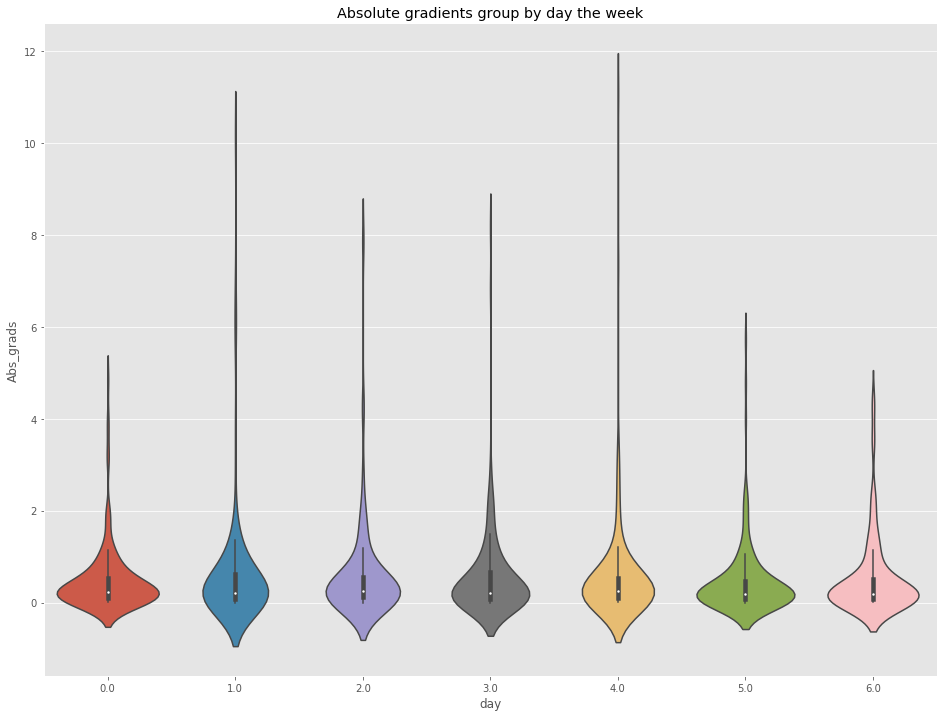

In [108]:
plt.figure(figsize=(16,12))
sns.violinplot(x='day',y="Abs_grads",data = df_by_date,showfliers=False)

plt.title("Absolute gradients group by day the week")
plt.savefig("../../../report/fig/week_trend.png",dpi=250)

In [92]:
np.array(range(len(temp)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# volume

In [125]:
print(df[['close','returns','abs_ret','volume']].corr().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     close &   returns &   abs\_ret &    volume \\
\midrule
close   &  1.000000 &  0.012390 &  0.528951 &  0.059851 \\
returns &  0.012390 &  1.000000 & -0.021348 & -0.006424 \\
abs\_ret &  0.528951 & -0.021348 &  1.000000 &  0.412379 \\
volume  &  0.059851 & -0.006424 &  0.412379 &  1.000000 \\
\bottomrule
\end{tabular}



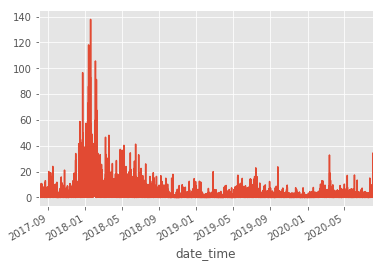

In [120]:
abs(df["returns"]).plot()

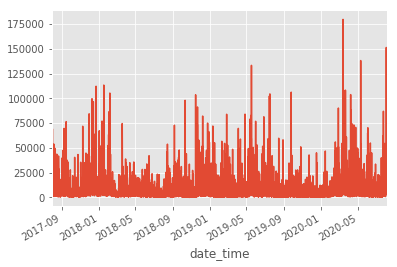

In [119]:
df["volume"].plot()

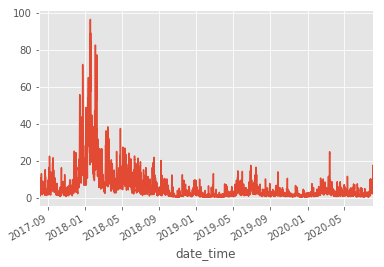

In [127]:
df["close"].rolling(24).std().plot()

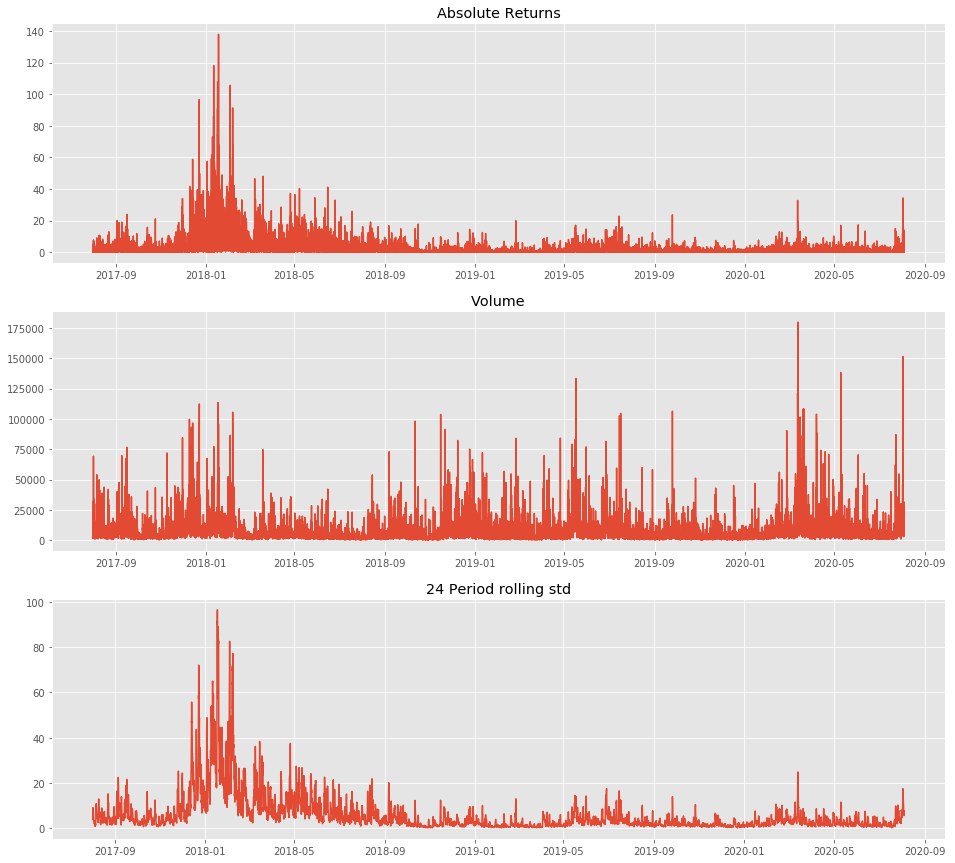

In [136]:
fig,ax = plt.subplots(3,1,figsize=(16,15))

ax[0].plot(abs(df["returns"]))
ax[0].set_title("Absolute Returns")
ax[1].plot(abs(df["volume"]))
ax[1].set_title("Volume")
ax[2].plot(df["close"].rolling(24).std())
ax[2].set_title("24 Period rolling std")
plt.savefig("../../../report/fig/rvs.png",dpi=250)

In [138]:
df["std_24"] = df["close"].rolling(24).std()
df[['close','returns','abs_ret',"std_24",'volume']].corr()

,close,returns,abs_ret,std_24,volume
close,1.000000,0.012390,0.528951,0.720088,0.059851
returns,0.012390,1.000000,-0.021348,-0.003667,-0.006424
abs_ret,0.528951,-0.021348,1.000000,0.662447,0.412379
std_24,0.720088,-0.003667,0.662447,1.000000,0.318054
volume,0.059851,-0.006424,0.412379,0.318054,1.000000


In [139]:
print(df[['close','returns','abs_ret',"std_24",'volume']].corr().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     close &   returns &   abs\_ret &    std\_24 &    volume \\
\midrule
close   &  1.000000 &  0.012390 &  0.528951 &  0.720088 &  0.059851 \\
returns &  0.012390 &  1.000000 & -0.021348 & -0.003667 & -0.006424 \\
abs\_ret &  0.528951 & -0.021348 &  1.000000 &  0.662447 &  0.412379 \\
std\_24  &  0.720088 & -0.003667 &  0.662447 &  1.000000 &  0.318054 \\
volume  &  0.059851 & -0.006424 &  0.412379 &  0.318054 &  1.000000 \\
\bottomrule
\end{tabular}



## abnornally low volume

In [141]:
df_days = df.resample("1D").mean()

In [145]:
df_days.sort_values(by='volume').head(10)["volume"]

date_time
2018-11-11     725.863348
2018-07-29     763.086708
2018-10-28     893.016279
2019-12-08     971.434971
2018-07-22    1033.791602
2019-03-24    1046.961928
2019-12-22    1099.794516
2019-11-03    1140.718775
2018-11-12    1146.788031
2019-11-10    1151.447176
Name: volume, dtype: float64